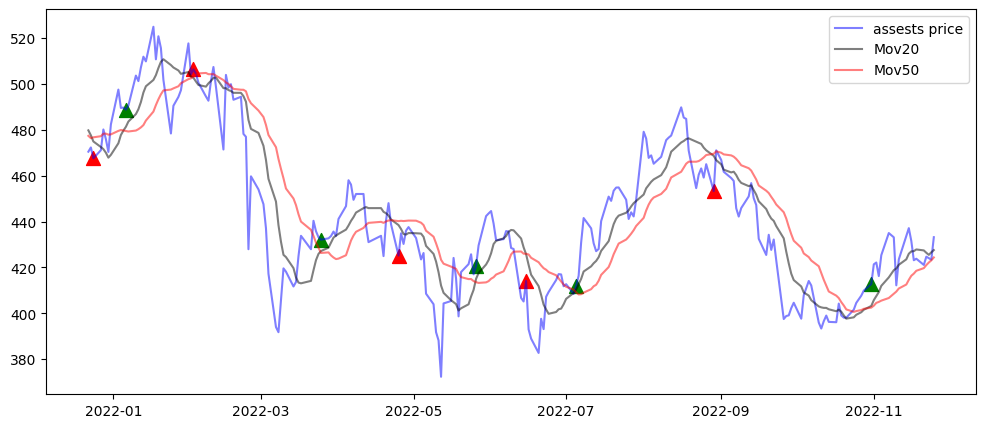

In [58]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt

#enter the name of stock in place of EICHERMOT

stock = yf.Ticker("TATAMOTORS.NS")

data = stock.history(period="1Y")
data = data.drop(['Open','High','Low','Volume','Dividends','Stock Splits'], axis=1)

data['Mov20']=data['Close'].rolling(10).mean()
data['Mov50']=data['Close'].rolling(20).mean()
data=data.dropna()

Buy = []
Sell = []
for i in range(len(data)):
    if data.Mov20.iloc[i] > data.Mov50.iloc[i] \
    and data.Mov20.iloc[i-1] < data.Mov50.iloc[i-1]:
        Buy.append(i)
    elif data.Mov20.iloc[i] < data.Mov50.iloc[i] \
    and data.Mov20.iloc[i-1] > data.Mov50.iloc[i-1]:
        Sell.append(i)
        
plt.figure(figsize=(12,5)) 
plt.plot(data['Close'], label= 'assests price', c='blue', alpha=0.5)
plt.plot(data['Mov20'], label= 'Mov20', c='k', alpha=0.5)
plt.plot(data['Mov50'], label= 'Mov50', c='r', alpha=0.5)
plt.scatter(data.iloc[Buy].index,data.iloc[Buy]['Close'],marker='^',color='green', s=100)
plt.scatter(data.iloc[Sell].index,data.iloc[Sell]['Close'],marker='^',color='red', s=100)
plt.legend()
